In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  



In [3]:
data_set = pd.read_excel('/Users/simranrao/Downloads/Crop_recommendation.xlsx')


In [4]:
data_set.head(100)



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576693,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [5]:
data_set.size


17600

In [6]:
data_set.shape


(2200, 8)

In [7]:
data_set.count()


N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [8]:
data_set['label'].value_counts()


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [9]:
data_set.columns



Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
missing_values = data_set.isnull().sum()


In [11]:
missing_values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

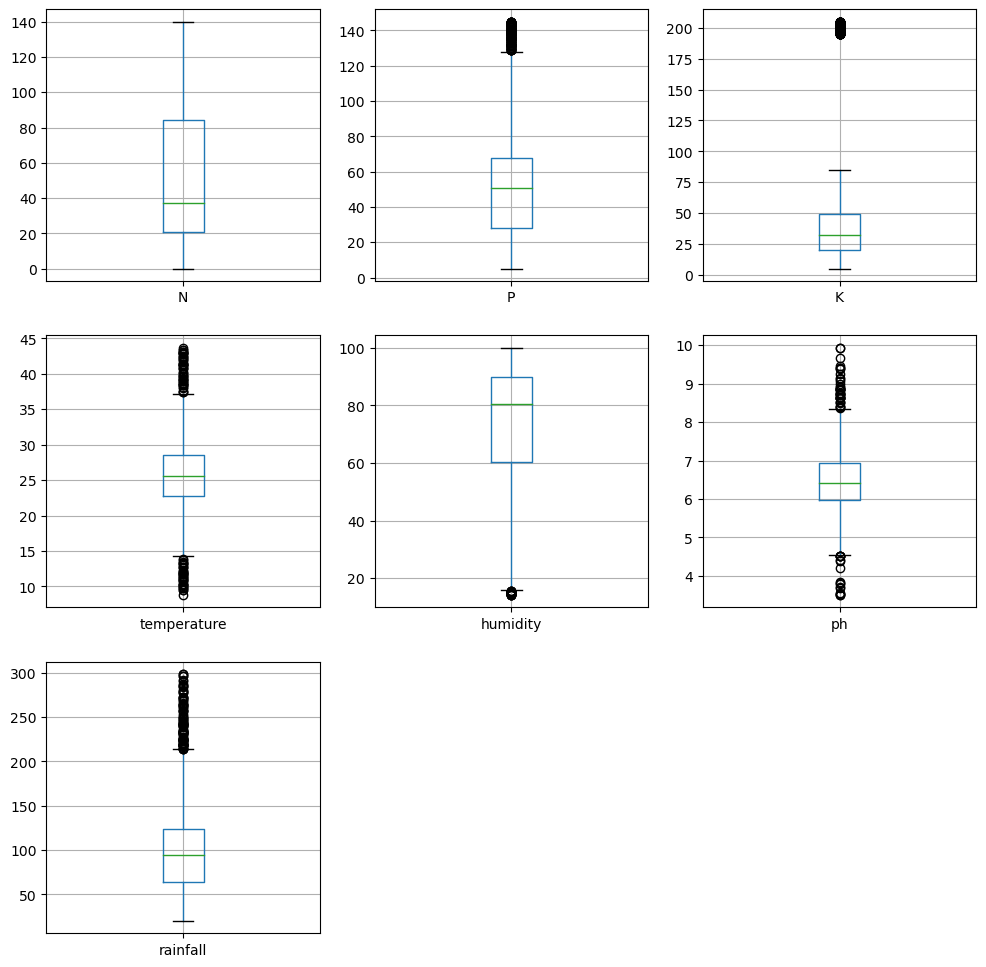

In [12]:
plt.figure(figsize=(12,12))
i=1
for col in data_set.iloc[:,:-1]:
    plt.subplot(3,3,i)
    data_set[[col]].boxplot()
    i+=1

In [23]:
# Calculate Q1, Q3, and IQR for all columns except the last one
Q1 = data_set.iloc[:, :-1].quantile(0.25)
Q3 = data_set.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Define a mask for values that are NOT outliers
mask = ~((data_set.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (data_set.iloc[:, :-1] > (Q3 + 1.5 * IQR)))

# Apply the mask to df, keeping all rows in the last column
data_set_no_outliers = data_set[mask.all(axis=1)]
data_set_no_outliers

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [24]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:

# Separate the features from the labels
features = data_set_no_outliers.iloc[:, :-1]
labels = data_set_no_outliers.iloc[:, -1]

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame
data_set_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add the labels back into the DataFrame
data_set_scaled['label'] = labels.values
data_set_scaled

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.411111,0.4750,0.286836,0.786537,0.515697,0.946048,rice
1,0.664286,0.566667,0.3875,0.424416,0.787180,0.642575,0.854623,rice
2,0.671429,0.500000,0.4000,0.496859,0.770640,0.632999,0.980486,rice
3,0.650000,0.333333,0.4250,0.414715,0.767724,0.639019,0.963266,rice
4,0.635714,0.444444,0.3875,0.306376,0.768395,0.499748,0.855763,rice
...,...,...,...,...,...,...,...,...
1763,0.764286,0.322222,0.3375,0.545515,0.601446,0.588729,0.815778,coffee
1764,0.707143,0.111111,0.2750,0.573708,0.485366,0.406032,0.557682,coffee
1765,0.842857,0.311111,0.3125,0.429542,0.611085,0.478696,0.792729,coffee
1766,0.835714,0.300000,0.3625,0.523476,0.431832,0.583122,0.553802,coffee


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset into a DataFrame named 'data_set'
# Example:
# data_set = pd.read_csv('your_dataset.csv')

# Assuming your dataset is loaded into a DataFrame named 'data_set'
# Splitting into features and labels
X = data_set.drop(columns=['label'])  # Features
y = data_set['label']  # Labels

# Encoding the categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust kernel, C, and gamma based on your data

# Training the SVM classifier
svm_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example prediction for user input
user_input = [[0.6, 0.4, 0.4, 0.3, 0.7, 0, 0]]  # Example user input
predicted_crop_index = svm_classifier.predict(user_input)
predicted_crop = label_encoder.inverse_transform(predicted_crop_index)
print("Predicted crop:", predicted_crop[0])


Accuracy: 0.9613636363636363
Predicted crop: mothbeans


/Users/simranrao/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [13]:
# Calculate Q1, Q3, and IQR for all columns except the last one
Q1 = data_set.iloc[:, :-1].quantile(0.25)
Q3 = data_set.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Define a mask for values that are NOT outliers
mask = ~((data_set.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (data_set.iloc[:, :-1] > (Q3 + 1.5 * IQR)))

# Apply the mask to df, keeping all rows in the last column
data_set_no_outliers = data_set[mask.all(axis=1)]
data_set_no_outliers

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset into a DataFrame named 'data_set'
# Example:
# data_set = pd.read_csv('your_dataset.csv')

# Assuming your dataset is loaded into a DataFrame named 'data_set'
# Splitting into features and labels
X = data_set.drop(columns=['label'])  # Features
y = data_set['label']  # Labels

# Encoding the categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  

# Training the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example prediction for user input
user_input = [[45, 12, 36, 25, 80, 6.5, 0]]  # Example user input
predicted_crop_index = rf_classifier.predict(user_input)
predicted_crop = label_encoder.inverse_transform(predicted_crop_index)
print("Predicted crop:", predicted_crop[0])


Accuracy: 0.9931818181818182
Predicted crop: muskmelon


/Users/simranrao/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset into a DataFrame named 'data_set'
# Example:
# data_set = pd.read_csv('your_dataset.csv')

# Assuming your dataset is loaded into a DataFrame named 'data_set'
# Splitting into features and labels
X = data_set.drop(columns=['label'])  # Features
y = data_set['label']  # Labels

# Encoding the categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Gradient Boosting Machine classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)  

# Training the Gradient Boosting Machine classifier
gbm_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = gbm_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example prediction for user input
user_input = [[45, 12, 36, 25, 80, 6.5, 20]]  # Example user input
predicted_crop_index = gbm_classifier.predict(user_input)
predicted_crop = label_encoder.inverse_transform(predicted_crop_index)
print("Predicted crop:", predicted_crop[0])


Accuracy: 0.9818181818181818
Predicted crop: muskmelon


/Users/simranrao/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test.values, y_test, clf=svm_classifier, legend=2)

# Adding axes annotations
plt.xlabel('rainfall')
plt.ylabel('ph')
plt.title('SVM Decision Boundary')
plt.show()


NameError: name 'X_test' is not defined

<Figure size 1000x600 with 0 Axes>